# BANK CHURN PREDICTION

The dataset is about predicting customer churn in the banking sector. It contains various features like credit score, age, tenure, balance, number of products, credit card status, active membership status, estimated salary, and churn status. Predicting customer churn is critical for businesses, especially in the banking sector. Retaining existing customers is often more cost-effective than acquiring new ones. By predicting which customers are likely to churn, banks can proactively address their concerns and improve customer retention.<br>
Mem__no__Products= NumOfProducts * IsActiveMember.<br>
Cred_Bal_Sal= (Credit Score * Balance) / EstimatedSalary.

# Importing Data and Modules

In [2]:
!pip install pandas

     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     ------------------------------- ------ 51.2/61.0 kB 650.2 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 651.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   - -------------------------------------- 0.4/11.5 MB 8.3 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/11.5 MB 19.7 MB/s eta 0:00:01
   --------- ------------------------------ 2.8/11.5 MB 19.6 MB/s eta 0:00:01
   ------------- -------------------------- 4.0/11.5 MB 19.6 MB/s eta 0:00:01
   -------------------- ------------------- 5.9/11.5 MB 22.2 MB/s eta 0:00:01
   ------------------------- -------------- 7.5/11.5 MB 23.9 MB/s eta 0:00:01
   ---------------------------- ----------- 8.2/11.5 MB 25.0 MB/s eta 0:00:01
   ---------------------------- ----------- 8.2/11.5 MB 20.2 MB/s eta 0:00:01
  

In [4]:
!python --version


Python 3.12.3


In [5]:
data = pd.read_csv(r"C:\Users\chara\Downloads\archive\Dataset.csv")

In [6]:
data.head()

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
0,2023,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,...,1,0,0,0,1,0.0,0.000000,0.000000,0.090909,99.0
1,2024,627.0,33.0,1.0,0.00,2.0,1,1,49503.50,0,...,1,0,0,0,1,2.0,0.000000,0.000000,0.030303,33.0
2,1236,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,...,1,0,0,0,1,0.0,0.000000,0.000000,0.250000,400.0
3,1362,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,...,1,0,0,0,1,1.0,1022.940581,1.760655,0.058824,68.0
4,491,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,...,0,0,1,0,1,2.0,0.000000,0.000000,0.151515,165.0


In [7]:
data.columns

Index(['Surname', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Surname_tfidf_0', 'Surname_tfidf_1', 'Surname_tfidf_2',
       'Surname_tfidf_3', 'Surname_tfidf_4', 'France', 'Germany', 'Spain',
       'Female', 'Male', 'Mem__no__Products', 'Cred_Bal_Sal', 'Bal_sal',
       'Tenure_Age', 'Age_Tenure_product'],
      dtype='object')

In [3]:
import pandas as pd

In [8]:
#Droping Unwanted columns
discarding_columns = ['Surname','Surname_tfidf_0', 'Surname_tfidf_1', 'Surname_tfidf_2',
       'Surname_tfidf_3', 'Surname_tfidf_4']

In [9]:
data.drop(discarding_columns,axis=1,inplace=True)

In [89]:
data[data['Exited']==1]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
5,588.0,36.0,4.0,131778.58,1.0,1,0,136024.31,1,0,1,0,0,1,0.0,569.646742,0.968787,0.111111,144.0
18,645.0,55.0,8.0,120105.43,1.0,1,0,125083.29,1,0,1,0,1,0,0.0,619.331346,0.960204,0.145455,440.0
19,559.0,61.0,1.0,153711.26,1.0,0,1,180890.40,1,1,0,0,0,1,1.0,475.009146,0.849748,0.016393,61.0
23,554.0,44.0,9.0,121823.26,1.0,1,0,79577.68,1,0,1,0,0,1,0.0,848.103212,1.530872,0.204545,396.0
25,703.0,39.0,9.0,0.00,1.0,1,0,131363.57,1,0,0,1,0,1,0.0,0.000000,0.000000,0.230769,351.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175005,610.0,50.0,1.0,113957.01,2.0,1,0,196526.55,1,0,1,0,0,1,0.0,353.711883,0.579856,0.020000,50.0
175011,498.0,42.0,3.0,152039.70,1.0,1,1,53445.17,1,0,1,0,0,1,1.0,1416.699967,2.844779,0.071429,126.0
175012,655.0,46.0,7.0,137145.12,1.0,1,0,115146.40,1,0,1,0,1,0,0.0,780.137752,1.191050,0.152174,322.0
175021,597.0,53.0,4.0,88381.21,1.0,1,0,69384.71,1,1,0,0,1,0,0.0,760.449707,1.273785,0.075472,212.0


In [10]:
data.shape

(175028, 19)

In [11]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
count,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,1.750280e+05,175028.000000,175028.000000,175028.000000
mean,656.113068,38.171337,5.019968,56676.772103,1.553072,0.751183,0.498754,111863.295024,0.211149,0.566909,0.212046,0.221045,0.436644,0.563356,0.784989,1.444363e+03,2.202494,0.138587,191.346929
std,81.148273,8.969565,2.811155,62982.418525,0.549212,0.432329,0.500000,50815.118428,0.408125,0.495504,0.408758,0.414952,0.495971,0.495971,0.871599,6.097238e+04,92.679435,0.085465,118.745788
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,73225.310000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.068182,93.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,116969.730000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.131579,180.000000
75%,710.000000,42.000000,7.000000,120727.970000,2.000000,1.000000,1.000000,154767.340000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,6.585861e+02,1.000001,0.200000,272.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,8.634204e+06,12863.796200,0.555556,880.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175028 entries, 0 to 175027
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         175028 non-null  float64
 1   Age                 175028 non-null  float64
 2   Tenure              175028 non-null  float64
 3   Balance             175028 non-null  float64
 4   NumOfProducts       175028 non-null  float64
 5   HasCrCard           175028 non-null  int64  
 6   IsActiveMember      175028 non-null  int64  
 7   EstimatedSalary     175028 non-null  float64
 8   Exited              175028 non-null  int64  
 9   France              175028 non-null  int64  
 10  Germany             175028 non-null  int64  
 11  Spain               175028 non-null  int64  
 12  Female              175028 non-null  int64  
 13  Male                175028 non-null  int64  
 14  Mem__no__Products   175028 non-null  float64
 15  Cred_Bal_Sal        175028 non-nul

In [13]:
data.isna().sum()

CreditScore           0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
France                0
Germany               0
Spain                 0
Female                0
Male                  0
Mem__no__Products     0
Cred_Bal_Sal          0
Bal_sal               0
Tenure_Age            0
Age_Tenure_product    0
dtype: int64

No missing values present in the data

## Exploratory Data Analysis

### Univariate Analysis

In [16]:
!pip install seaborn matplotlib

     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     -- ------------------------------------- 10.2/162.8 kB ? eta -:--:--
     ----------------------------------- -- 153.6/162.8 kB 2.3 MB/s eta 0:00:01
     -------------------------------------- 162.8/162.8 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 294.9/294.9 kB 9.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
   ---- ----------------------------------- 0.9/7.7 MB 28.4 MB/s eta 0:00:01
   ---------- ----------------------------- 2.1/7.7 MB 26.7 MB/s eta 0:00:01
   ------------------ --------------------- 3.6/7.7 MB 28.6 MB/s eta 0:00:01
   --------------------- ------------------ 4.2/7.7 MB 24.4 MB/s eta 0:00:01
   ----------------------------------- ---- 6.8/7.7 MB 30.9 MB/s eta 0:00:01
   ---------------------------------------- 7.7/7.7 MB 28.8 MB/s eta 0:00:00
   --------

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'France', 'Germany',
       'Spain', 'Female', 'Male', 'Mem__no__Products', 'Cred_Bal_Sal',
       'Bal_sal', 'Tenure_Age', 'Age_Tenure_product'],
      dtype='object')

<Figure size 1000x1800 with 0 Axes>

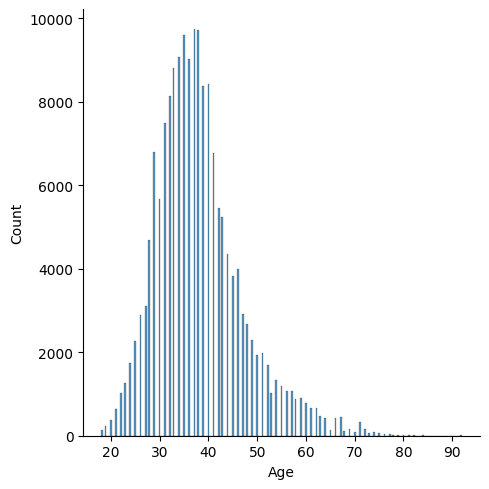

In [19]:
#Age Distribution
plt.figure(figsize=(10,18))
sns.displot(data=data, x='Age')
plt.show()

<Figure size 1000x1800 with 0 Axes>

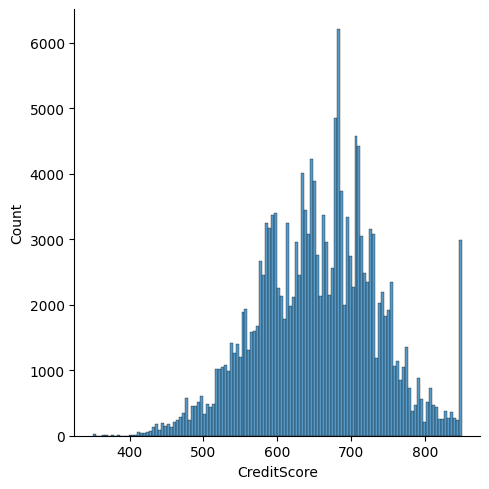

In [20]:
#CreditScore Distribution
plt.figure(figsize=(10,18))
sns.displot(data=data, x='CreditScore')
plt.show()

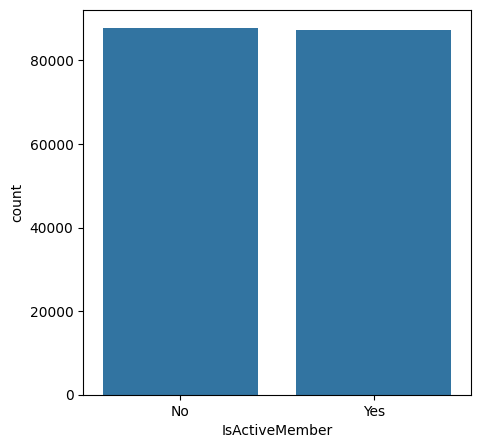

In [21]:
#isActiveMember Distribution
plt.figure(figsize=(5,5))
sns.countplot(data=data, x='IsActiveMember')
plt.xticks(ticks=[0,1],labels=['No','Yes'])
plt.show()

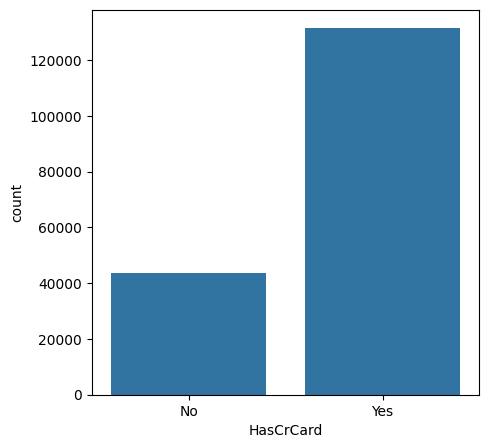

In [22]:
#HasCrCard Distribution
plt.figure(figsize=(5,5))
sns.countplot(data=data, x='HasCrCard')
plt.xticks(ticks=[0,1],labels=['No','Yes'])
plt.show()

In [23]:
#country wise instances in the data
countries = {'France':sum(data['France']),'Germany':sum(data['Germany']),'Spain':sum(data['Spain'])}

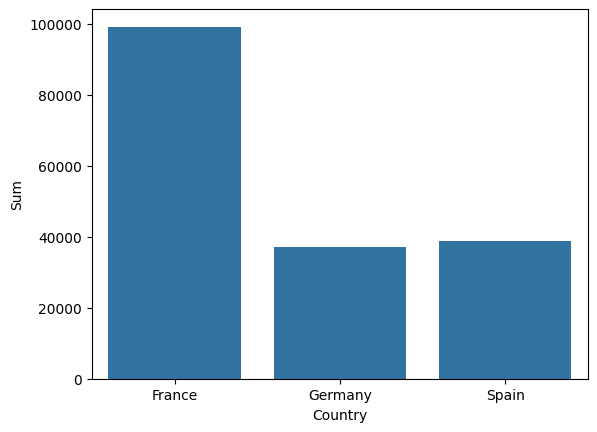

In [24]:
sns.barplot(x='Country', y='Sum', data=pd.DataFrame(list(countries.items()), columns=['Country', 'Sum']))
plt.show()

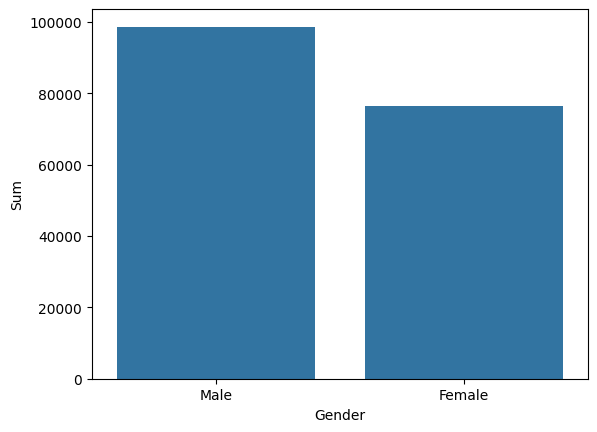

In [25]:
#Gender distribution in the data
gender = {'Male':sum(data['Male']),'Female':sum(data['Female'])}

sns.barplot(x='Gender', y='Sum', data=pd.DataFrame(list(gender.items()), columns=['Gender', 'Sum']))
plt.show()

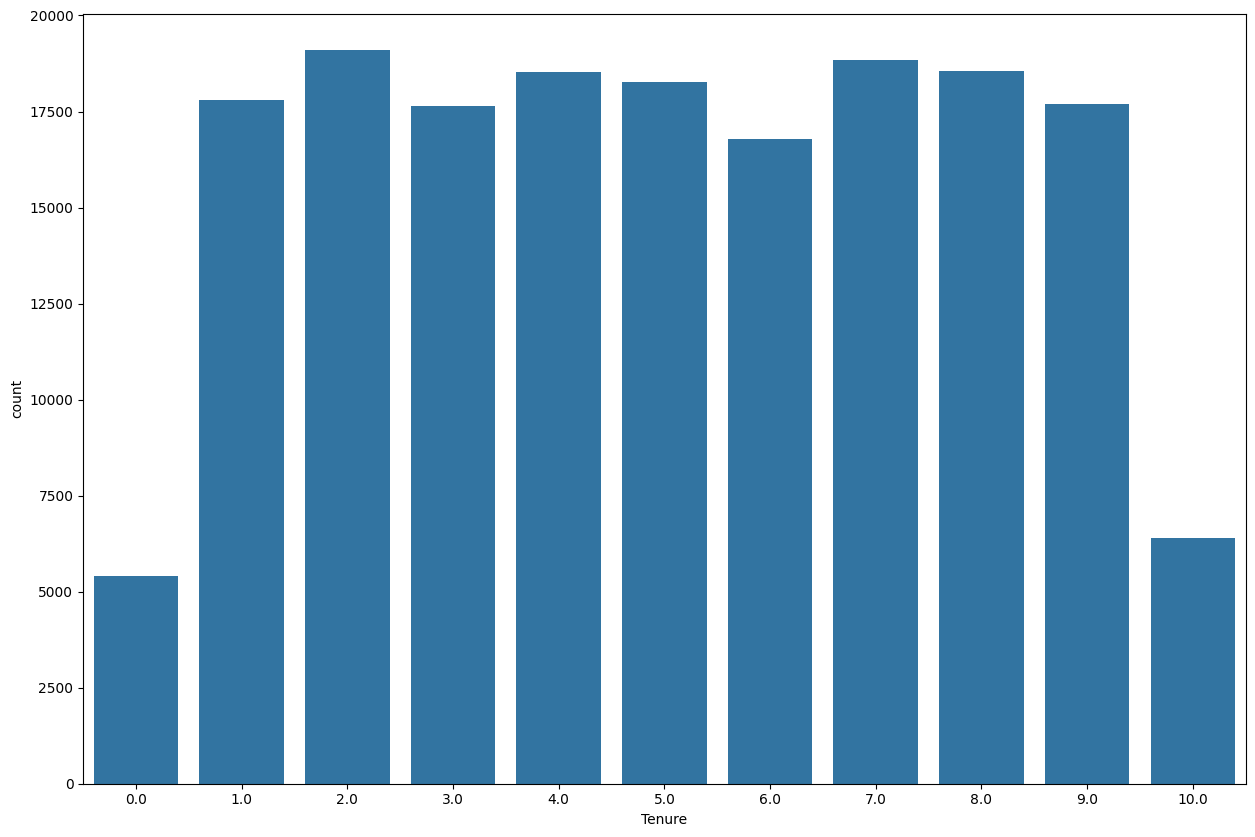

In [26]:
#Tenure Distribution
plt.figure(figsize=(15,10))
sns.countplot(data=data, x='Tenure')
plt.show()

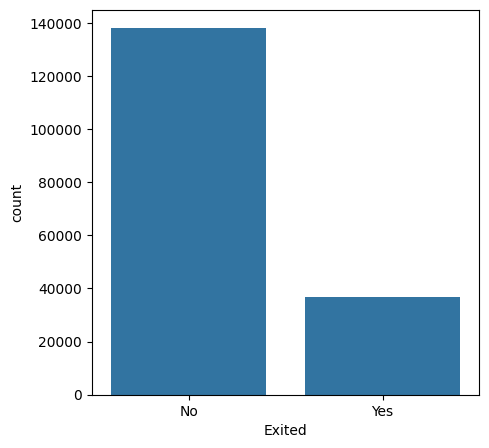

In [27]:
#isActiveMember Distribution
plt.figure(figsize=(5,5))
sns.countplot(data=data, x='Exited')
plt.xticks(ticks=[0,1],labels=['No','Yes'])
plt.show()

The Exited(target feature) is unbalanced

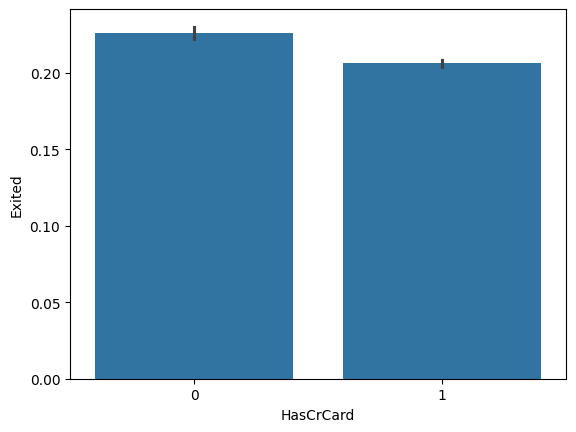

In [28]:
#Credit card vs Exited
sns.barplot(x='HasCrCard', y='Exited', data=data)
plt.show()

### Bivariate Analysis

In [29]:
melted_data = pd.melt(data, id_vars=['Exited'], value_vars=['France', 'Germany', 'Spain'])

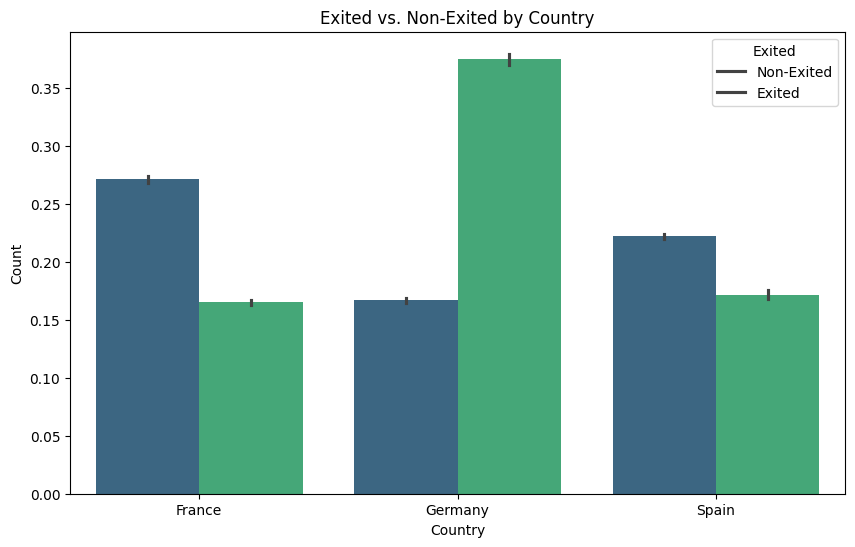

In [30]:
#Plot betwwen Exited vs Non-Exited by Country
plt.figure(figsize=(10, 6))
sns.barplot(x='variable', y='Exited', hue='value', data=melted_data, palette='viridis')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Exited vs. Non-Exited by Country')
plt.legend(title='Exited', labels=['Non-Exited', 'Exited'])
plt.xticks(rotation=0)
plt.show()

In [31]:
male_exited = data[(data['Male']==1) & (data['Exited']==1)]
female_exited = data[(data['Female']==1) & (data['Exited']==1)]

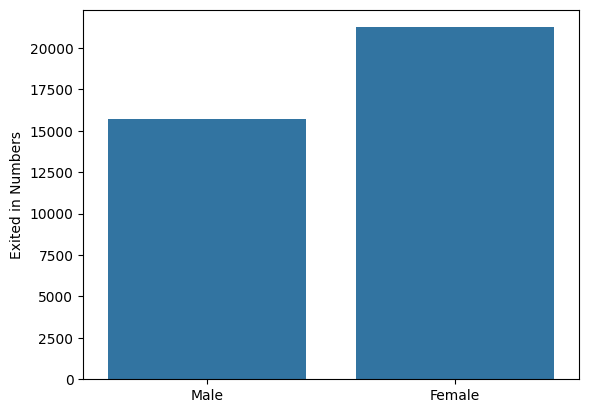

In [32]:
#Gender vs Exited in numbers
sns.barplot(x=['Male','Female'],y=[len(male_exited),len(female_exited)])
plt.ylabel('Exited in Numbers')
plt.show()

Is being an active member to products effecting Exiting from the bank

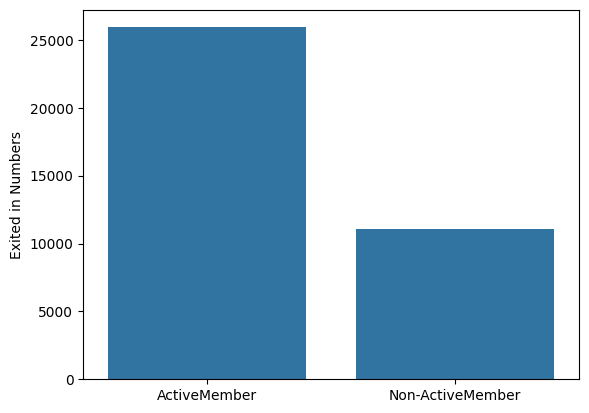

In [33]:
#Active member and Non-Active member vs Exited
active_member_exited = data[(data['IsActiveMember']==0) & (data['Exited']==1)]
non_active_exited = data[(data['IsActiveMember']==1) & (data['Exited']==1)]
sns.barplot(x=['ActiveMember','Non-ActiveMember'],y=[len(active_member_exited),len(non_active_exited)])
plt.ylabel('Exited in Numbers')
plt.show()

C:\Users\chara\AppData\Local\Temp\ipykernel_17588\2376963670.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mem__no__Products', y='Exited', data=grouped_data, palette='viridis')


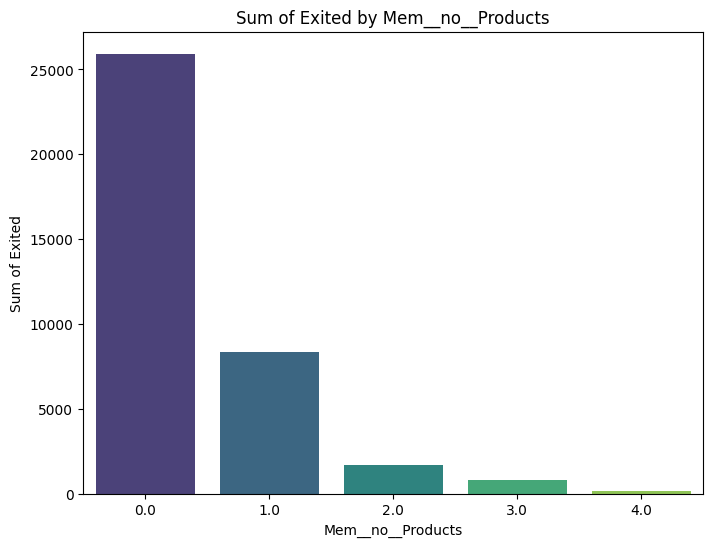

In [34]:
#Plot between Sum of Exited by Mem_no_Products.
grouped_data = data.groupby('Mem__no__Products')['Exited'].sum().reset_index()

grouped_data
plt.figure(figsize=(8, 6))
sns.barplot(x='Mem__no__Products', y='Exited', data=grouped_data, palette='viridis')
plt.xlabel('Mem__no__Products')
plt.ylabel('Sum of Exited')
plt.title('Sum of Exited by Mem__no__Products')
plt.show()

# Predictive Models

#### Data Split

In [35]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'France', 'Germany',
       'Spain', 'Female', 'Male', 'Mem__no__Products', 'Cred_Bal_Sal',
       'Bal_sal', 'Tenure_Age', 'Age_Tenure_product'],
      dtype='object')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175028 entries, 0 to 175027
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         175028 non-null  float64
 1   Age                 175028 non-null  float64
 2   Tenure              175028 non-null  float64
 3   Balance             175028 non-null  float64
 4   NumOfProducts       175028 non-null  float64
 5   HasCrCard           175028 non-null  int64  
 6   IsActiveMember      175028 non-null  int64  
 7   EstimatedSalary     175028 non-null  float64
 8   Exited              175028 non-null  int64  
 9   France              175028 non-null  int64  
 10  Germany             175028 non-null  int64  
 11  Spain               175028 non-null  int64  
 12  Female              175028 non-null  int64  
 13  Male                175028 non-null  int64  
 14  Mem__no__Products   175028 non-null  float64
 15  Cred_Bal_Sal        175028 non-nul

In [40]:
!pip install scikit-learn

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.6 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 645.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
    --------------------------------------- 0.2/10.6 MB 7.0 MB/s eta 0:00:02
   ---- ----------------------------------- 1.2/10.6 MB 14.8 MB/s eta 0:00:01
   --------- ------------------------------ 2.6/10.6 MB 20.4 MB/s eta 0:00:01
   ------------- -------------------------- 3.5/10.6 MB 20.3 MB/s eta 0:00:01
   --------------- ------------------------ 4.0/10.6 MB 21.2 MB/s eta 0:00:01
   -------------------- ------------------- 5.4/10.6 MB 20.2 MB/s eta 0:00:01
   --------------------------- ------------ 7.3/10.6 MB 23.3 MB/s eta 0:00:01
   ----------------------------- ---------- 7.8/10.6 MB 23.8 MB/s eta 0:00:01
  

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('Exited', axis=1), data['Exited'], test_size=0.3,shuffle=True, stratify=data["Exited"], random_state=79)

In [78]:
X_train.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'France', 'Germany', 'Spain',
       'Female', 'Male', 'Mem__no__Products', 'Cred_Bal_Sal', 'Bal_sal',
       'Tenure_Age', 'Age_Tenure_product'],
      dtype='object')

In [42]:
y_train.value_counts()

Exited
0    96649
1    25870
Name: count, dtype: int64

In [43]:
y_test.value_counts()

Exited
0    41422
1    11087
Name: count, dtype: int64

#### Standardization and Model Training

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
# Training the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [46]:
from sklearn.metrics import accuracy_score, classification_report
# Predicting on the test set
y_pred = model.predict(X_test_scaled)

# Calculating the accuracy for the test set
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.8340665409739283


In [47]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     41422
           1       0.70      0.38      0.49     11087

    accuracy                           0.83     52509
   macro avg       0.77      0.67      0.70     52509
weighted avg       0.82      0.83      0.81     52509



The logistic model is quite good at predicting customers who will not exit, but it is struggling to correctly identify a significant portion of customers who will exit. 

### Implementing Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier
# Training the Decision Tree classifier
model = DecisionTreeClassifier(max_depth=7)
model.fit(X_train_scaled, y_train)


DecisionTreeClassifier(max_depth=7)

In [49]:
# Making predictions on the test set
y_pred = model.predict(X_test_scaled)

In [50]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.94      0.92     41422
           1       0.73      0.56      0.63     11087

    accuracy                           0.86     52509
   macro avg       0.81      0.75      0.77     52509
weighted avg       0.85      0.86      0.86     52509



In [109]:
model.feature_importances_

array([2.57300425e-04, 4.10343583e-01, 0.00000000e+00, 3.49028366e-02,
       2.45781872e-01, 0.00000000e+00, 3.35420994e-02, 1.25410186e-03,
       3.07094562e-05, 2.90625588e-02, 1.01530395e-05, 1.83339091e-02,
       8.74873286e-03, 1.83829711e-01, 6.81544158e-03, 2.61260090e-02,
       5.93965898e-04, 3.67015873e-04])

In [110]:
X_train.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'France', 'Germany', 'Spain',
       'Female', 'Male', 'Mem__no__Products', 'Cred_Bal_Sal', 'Bal_sal',
       'Tenure_Age', 'Age_Tenure_product'],
      dtype='object')

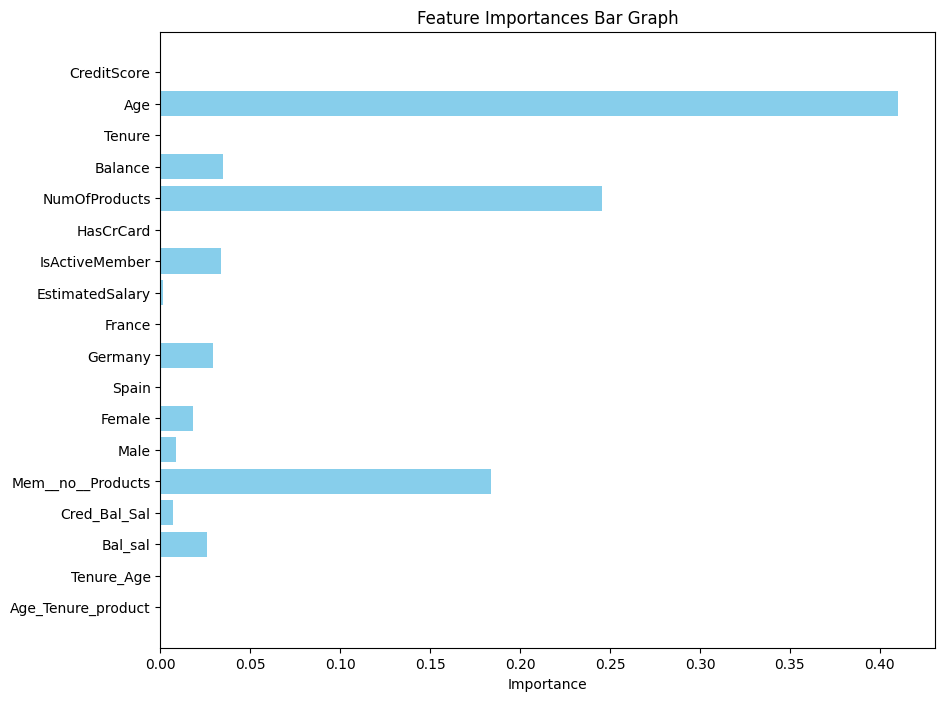

In [111]:
# Feature importances and corresponding labels from your model
feature_importances = [2.57300425e-04, 4.10343583e-01, 0.00000000e+00, 3.49028366e-02,
                       2.45781872e-01, 0.00000000e+00, 3.35420994e-02, 1.25410186e-03,
                       3.07094562e-05, 2.90625588e-02, 1.01530395e-05, 1.83339091e-02,
                       8.74873286e-03, 1.83829711e-01, 6.81544158e-03, 2.61260090e-02,
                       5.93965898e-04, 3.67015873e-04]
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
            'IsActiveMember', 'EstimatedSalary', 'France', 'Germany', 'Spain',
            'Female', 'Male', 'Mem__no__Products', 'Cred_Bal_Sal', 'Bal_sal',
            'Tenure_Age', 'Age_Tenure_product']

# Create bar graph
plt.figure(figsize=(10, 8))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances Bar Graph')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()


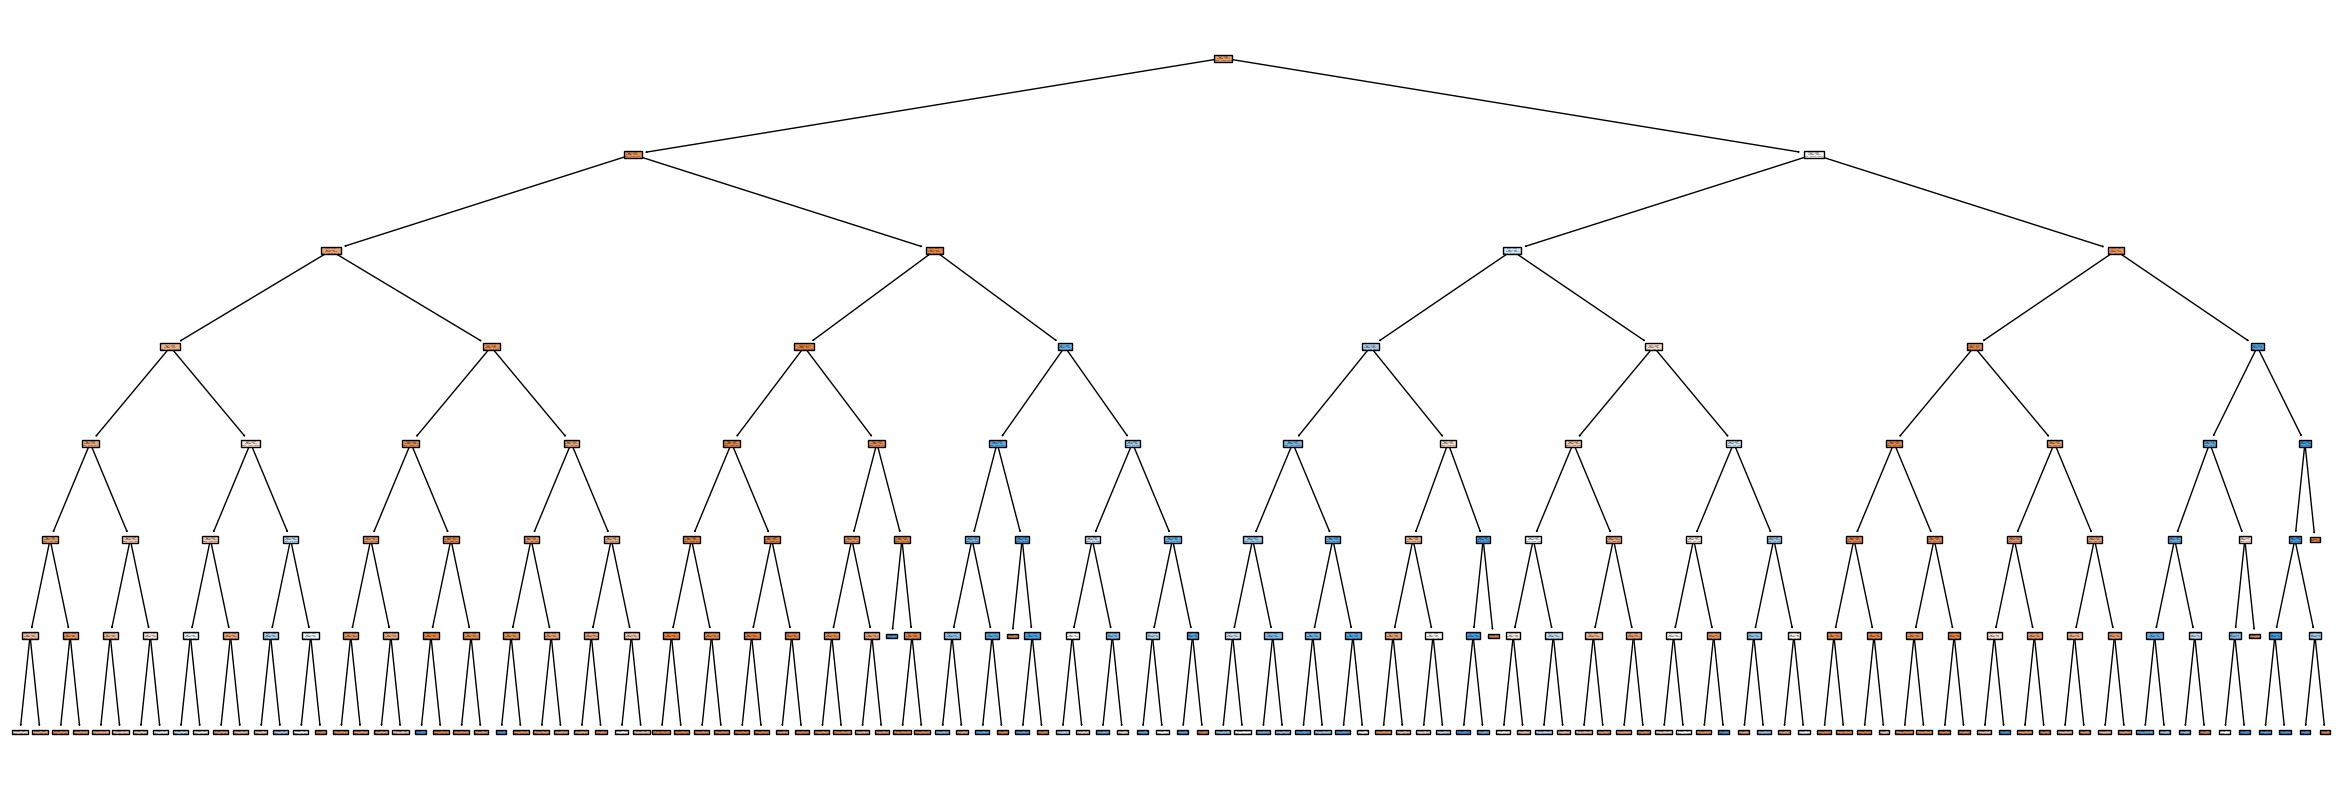

In [51]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotting the decision tree
plt.figure(figsize=(30,10))
plot_tree(model, filled=True)
plt.show()


### Implementing Random Forest Model

In [52]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_depth=10, n_estimators=7)

rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, n_estimators=7)

In [53]:
# Making predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.8626330724256794
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     41422
           1       0.75      0.52      0.62     11087

    accuracy                           0.86     52509
   macro avg       0.82      0.74      0.77     52509
weighted avg       0.85      0.86      0.85     52509



In [75]:
import pickle

In [76]:
pickle.dump(model,open("model.pkl",'wb'))

In [ ]:
'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'France', 'Germany', 'Spain',
       'Female', 'Male', 'Mem__no__Products', 'Cred_Bal_Sal', 'Bal_sal',
       'Tenure_Age', 'Age_Tenure_product']

In [81]:
data['Mem__no__Products'].value_counts()

Mem__no__Products
0.0    87732
2.0    47446
1.0    38619
3.0     1040
4.0      191
Name: count, dtype: int64

In [88]:
%%writefile streamlit.py
import streamlit as st
import pickle
# Title of the app
st.title('User Input Form')

# User input fields
gender = st.radio('Gender', ['Female', 'Male'])
Female = 1 if gender=='Female' else 0
Male = 1 if gender=='Male' else 0
country = st.selectbox('Country', ['France', 'Germany', 'Spain'])
France = 1 if country=='France' else 0
Germany = 1 if country=='Germany' else 0
Spain = 1 if country=='Spain' else 0
credit_score = st.number_input('Credit Score', min_value=0)
age = st.number_input('Age', min_value=0)
tenure = st.number_input('Tenure', min_value=0)
balance = st.number_input('Balance', min_value=0.0, format='%f')
num_of_products = st.number_input('Number of Products', min_value=0)
has_cr_card = st.radio('Has Credit Card', ['Yes', 'No'])
has_cr_card = 1 if has_cr_card=='Yes' else 0
is_active_member = st.radio('Is Active Member', ['Yes', 'No'])
is_active_member = 1 if is_active_member=='Yes' else 0
estimated_salary = st.number_input('Estimated Salary', min_value=0.0, format='%f')

# Submit button
if st.button('Submit'):
    st.write("Model_Loaded")
    model = pickle.load(open('model.pkl','rb'))
    st.write(model.predict([[credit_score, age, tenure, balance, num_of_products, has_cr_card, is_active_member, estimated_salary, France, Germany, Spain, Female, Male,1,100, 1000,1,1]]))
    st.write('Gender:', gender)
    st.write('Country:', country)
    st.write('Credit Score:', credit_score)
    st.write('Age:', age)
    st.write('Tenure:', tenure)
    st.write('Balance:', balance)
    st.write('Number of Products:', num_of_products)
    st.write('Has Credit Card:', has_cr_card)
    st.write('Is Active Member:', is_active_member)
    st.write('Estimated Salary:', estimated_salary)


Overwriting streamlit.py


In [67]:
!pip install streamlit

   ---------------------------------------- 0.0/8.5 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.5 MB 10.2 MB/s eta 0:00:01
   --------- ------------------------------ 2.0/8.5 MB 20.8 MB/s eta 0:00:01
   ------------- -------------------------- 2.9/8.5 MB 20.7 MB/s eta 0:00:01
   --------------------- ------------------ 4.6/8.5 MB 24.8 MB/s eta 0:00:01
   ---------------------------- ----------- 6.1/8.5 MB 26.0 MB/s eta 0:00:01
   --------------------------------- ------ 7.1/8.5 MB 25.4 MB/s eta 0:00:01
   ---------------------------------------  8.5/8.5 MB 27.2 MB/s eta 0:00:01
   ---------------------------------------- 8.5/8.5 MB 23.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/857.8 kB ? eta -:--:--
   --------------------------------------- 857.8/857.8 kB 53.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/97.9 kB ? eta -:--:--
   ---------------------------------------- 97.9/97.9 kB 5.5 MB/s eta 0:00:00
   -------------

In [70]:
!streamlit run streamlit.py --server.port 8501

^C


In [101]:
%%writefile ChurnPrediction.py
import streamlit as st
import pandas as pd
import pickle

# Load the model from the file (make sure to provide the correct path or place the model in the same directory)
model = pickle.load(open('model.pkl', 'rb'))

# Title of the app
st.title('Bank Churn Prediction')

# Ask the user for the input method
input_method = st.radio("Choose input method:", ("Enter single record", "Upload a file"))

if input_method == "Enter single record":
    # User input fields for a single record
    gender = st.radio('Gender', ['Female', 'Male'])
    Female = 1 if gender=='Female' else 0
    Male = 1 if gender=='Male' else 0
    country = st.selectbox('Country', ['France', 'Germany', 'Spain'])
    France = 1 if country=='France' else 0
    Germany = 1 if country=='Germany' else 0
    Spain = 1 if country=='Spain' else 0
    credit_score = st.number_input('Credit Score', min_value=0)
    age = st.number_input('Age', min_value=0)
    tenure = st.number_input('Tenure', min_value=0)
    balance = st.number_input('Balance', min_value=0.0, format='%f')
    num_of_products = st.number_input('Number of Products', min_value=0)
    has_cr_card = st.radio('Has Credit Card', ['Yes', 'No'])
    has_cr_card = 1 if has_cr_card=='Yes' else 0
    is_active_member = st.radio('Is Active Member', ['Yes', 'No'])
    is_active_member = 1 if is_active_member=='Yes' else 0
    estimated_salary = st.number_input('Estimated Salary', min_value=0.0, format='%f')
    
    # Additional input fields
    mem_no_products = st.number_input('Membership Number of Products', min_value=0)
    cred_bal_sal = st.number_input('Credit Balance Salary Ratio', min_value=0.0, format='%f')
    bal_sal = st.number_input('Balance Salary Ratio', min_value=0.0, format='%f')
    tenure_age = st.number_input('Tenure Age Ratio', min_value=0.0, format='%f')
    age_tenure_product = st.number_input('Age Tenure Product', min_value=0)
    
    # Submit button for single record
    if st.button('Predict for single record'):
        # Convert inputs to the format expected by the model
        # (This may include encoding categorical variables, scaling, etc.)
        #single_record = pd.DataFrame([[credit_score, age, tenure, balance, num_of_products, has_cr_card, is_active_member, estimated_salary, France, Germany, Spain, Female, Male, mem_no_products, cred_bal_sal, bal_sal, tenure_age, age_tenure_product]],
         #                            columns=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Country', 'Gender', 'Mem__no__Products', 'Cred_Bal_Sal', 'Bal_sal', 'Tenure_Age', 'Age_Tenure_product'])
        # Predict and display the result
        prediction = model.predict([[credit_score, age, tenure, balance, num_of_products, has_cr_card, is_active_member, estimated_salary, France, Germany, Spain, Female, Male, mem_no_products, cred_bal_sal, bal_sal, tenure_age, age_tenure_product]]
                                     )
        st.write('Prediction for the provided record is:', "Customer Exits" if prediction[0]==1 else "Customer Doesnot Exits")

elif input_method == "Upload a file":
    # File uploader allows user to add their own CSV
    uploaded_file = st.file_uploader("Upload your CSV file", type=["csv"])
    
    if uploaded_file is not None:
        # Read the data into a pandas dataframe
        data = pd.read_csv(uploaded_file)
        
        # Predict the 'Exited' feature
        predictions = model.predict(data.drop(columns=['Exited','Surname','Surname_tfidf_0', 'Surname_tfidf_1', 'Surname_tfidf_2','Surname_tfidf_3', 'Surname_tfidf_4']))
        
        # Combine the predictions with the original data
        data['Predicted Exited'] = predictions
        
        # Display the dataframe with a scrollbar
        st.dataframe(data, height=300)
        
        # Allow the user to download the result as a CSV
        st.download_button(label='Download CSV with predictions', data=data.to_csv(), file_name='predicted_churn.csv', mime='text/csv')

# Add any additional functionality you need below


Overwriting ChurnPrediction.py
